<a href="https://colab.research.google.com/github/xoxominji/22-1-ESAA-Practice/blob/main/0314_%EB%B0%95%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [개념정리]

## 핸즈온 Chapter 3. 분류 p.127~154

### 3.1 MNIST



사이킷런 데이터셋들의 공통적인 구조(dictionary)
- 데이터셋 설명의 DESCR 키
- 샘플-행, 특성-열로 구성된 data 키
- 레이블 배열의 target 키

mnist_784의 구조
- 70000개의 이미지(훈련 세트 60000개, 테스트세트 10000개)
- 784개의 특성(28*28 픽셀 이미지)
- 0(흰색)~255(검은색)의 픽셀 강도


### 3.2 이진 분류기 훈련



```
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=#)
model.fit(X_train, y_train)
model.predict()
```



SDGClassifier: 확률적 경사 하강법(Stochatic Gradient Descent) 분류기
- 매우 큰 데이터셋을 효율적으로 처리하는 장점
- 훈련 샘플을 독립적으로 처리
- 훈련시 무작위성 사용

### 3.3 성능 측정

#### 3.3.1 교차 검증을 사용한 정확도 측정

```
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_클래스, cv=#, scoring="accuracy")
```

불균형한 데이터셋에서는 정확도는 좋은 성능 측정 지표는 아님

#### 3.3.2 오차 행렬

클래스 A의 샘플이 클래스 B로 분류된 횟수 세기

```
from sklern.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train_클래스, cv=3) #예측값 계산

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_클래스, y_train_pred)
```

→ 예측 TN | FP

↓ 실제 FN | TP

- TN(True Negative): 숫자 5가 아니라고 예측되었고 실제로도 숫자 5가 아닌 경우의 수
- FP(False Positive): 숫자 5를 가리킨다고 예측되었지만 실제로는 숫자 5가 아닌 경우의 수
- FN(False Negative): 숫자 5가 아니라고 예측되었지만 실제로는 숫자 5인 경우의 수
- TP(True Positive): 숫자 5를 가리킨다고 예측되었고 실제로도 숫자 5인 경우의 수


#### 3.3.3 정밀도와 재현율

**정밀도(Precision)**: 양성 예측의 정확도

$\frac{FP}{TP+FP}$

**재현율(Recall)=민감도(Sensitivity), 진짜 양성 비율(TPR)**: 정확하게 감지한 양성 샘플의 비율

$\frac{TP}{TP+FN}$

```
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_클래스, y_train_pred)
recall_score(y_train_클래스, y_train_pred)
```

**F1점수**: 정밀도와 재현율의 조화 평균

$\frac{2}{\frac{1}{정밀도}+\frac{1}{재현율}}$

```
from sklearn.metrics import f1_score
f1_score(y_train_클래스, y_train_pred)
```

정밀도와 재현율이 비슷할수록 F1 점수 높음

#### 3.3.4 정밀도/재현율 트레이드오프

: 정밀도↔재현율 반비례

분류기는 결정 함수(decision function)을 이용하여 각 샘플의 점수를 계산한 후 결정 임곗값(decision threshold)보다 크면 양성 클래스로, 작으면 음성 클래스로 분류

SGDClassifier의 결정 임곗값은 0임

임곗값을 높이면 재현율↓

적절한 임곗값 찾기: 재현율 vs. 정밀도 그래프에서 하강점 직전 지점 선택


#### 3.3.5 ROC 곡선

: 거짓 양성 비율(FPR)에 대한 참 양성 비율(TPR)의 관계를 나타낸 곡선



```
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_클래스, y_scores)
```

재현율(TPR)↔거짓양성(FPR)의 트레이드오프

좋은 분류기: 점선에서 최대한 멀리 떨어지도록, 곡선 아래의 면적(AUC) 점수 높을수록



```
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_클래스, y_scores)
```



### 3.4 다중 분류

: 둘 이상의 클래스 구별

- SGD
- RF
- 나이브 베이즈(naive Bayes)

이진분류 only
- Logistic Regression
- SVM(Support Vector Machine)


**OvR/OvA(일대다) 방식**: 각 샘플에 대해 총 10번 각기 다른 이진 분류기를 실행한 후, 각 분류기의 결정 점수 중에서 가장 높은 점수를 받은 클래스 선택


```
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(SVC()) #SVC기반
#SGD, RF는 직접 지원
```


**OvO(일대일) 방식**: 조합 가능한 모든 일대일 분류 방식을 진행하여 가장 많은 결투(duell)를 이긴 숫자를 선택


### 3.5 에러 분석



```
#오차행렬의 이미지화
plt.matchow(오차행렬, cmap=plt.cm.gray)
```

에러 비율: 오차 행렬의 각 값 / 대응되는 클래스의 이미지 개수


### 3.6 다중 레이블 분류
: 각 샘플마다 여러개의 클래스 출력, 여러 개의 이진 꼬리표 출력하는 분류 시스템


KNeighborsClassifier는 다중 레이블 분류를 지원, 모든 분류기가 그런 것은 아님

## 3.7 다중 출력 분류
: 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화(두 개 이상의 값)

# [필사]

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame= False) #추가
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

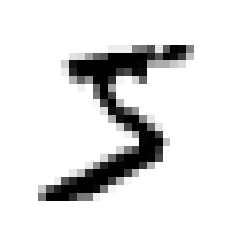

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
y[0]

'5'

In [ ]:
import numpy as np
y = y.astype(np.uint8)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]



---



---



In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])



---



---



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5 #완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])



---



---



In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846



---



---



In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706



---



---



In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

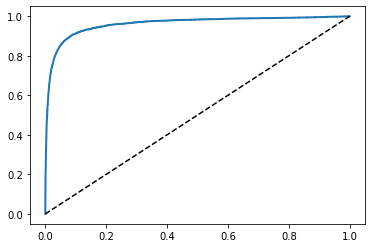

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
# 랜덤 포레스트 분류기의 AUC
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

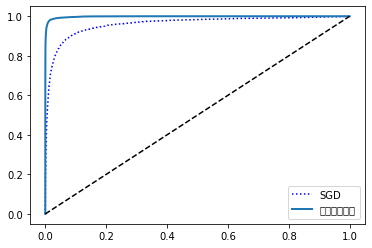

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤포레스트")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145



---



---



In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) #y_train_5가 아니고 y_train을 사용
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

5

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

10

In [ ]:
#SGDClassifier의 OvR/OvO
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
#스케일 조정시 정확도 증가 가능
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])



---



---



In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

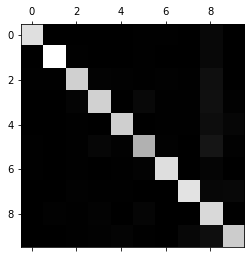

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
#조금 더 어두운 5, 이미지가 적거나 분류기에 숫자 5를 다른 숫자만큼 잘 분류하지 못함을 뜻함

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums #에러 비율

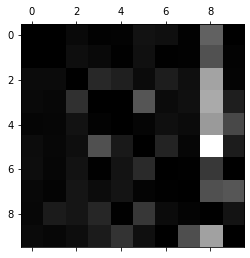

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#클래스 8열의 오류: 3과 5가 8로 많이 혼돈, 8은 8로 잘 분류됨



---



---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605



---



---



In [ ]:
#잡음 제거 시스템
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test